### EDA Analysis

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("cleaned_downtime.csv", parse_dates=["time_down", "time_up"])
df.head()

,id,device_ip,device_name,time_down,time_up,plant_code,location_name,plant_name,status,idel_time,downtime_minutes,down_hour,down_day,down_minute,is_weekend,month
0,231,10.235.125.61,WBCONTROLLER,2025-06-08 09:51:50,2025-06-08 09:56:45,N212,WB01,Tikariya,C,00:04:55,4.916667,9,6,51,1,6
1,232,10.235.125.61,WBCONTROLLER,2025-06-08 10:21:50,2025-06-08 10:26:45,N212,WB01,Tikariya,C,00:04:55,4.916667,10,6,21,1,6
2,233,10.235.125.66,WBCONTROLLER,2025-06-08 10:47:00,2025-06-08 10:51:55,N212,WB02,Tikariya,C,00:04:55,4.916667,10,6,47,1,6
3,236,10.235.125.66,WBCONTROLLER,2025-06-08 12:12:00,2025-06-08 12:16:55,N212,WB02,Tikariya,C,00:04:55,4.916667,12,6,12,1,6
4,238,10.235.125.61,WBCONTROLLER,2025-06-08 14:16:50,2025-06-08 14:21:45,N212,WB01,Tikariya,C,00:04:55,4.916667,14,6,16,1,6


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2001 non-null   int64         
 1   device_ip         2001 non-null   object        
 2   device_name       2001 non-null   object        
 3   time_down         2001 non-null   datetime64[ns]
 4   time_up           2001 non-null   datetime64[ns]
 5   plant_code        2001 non-null   object        
 6   location_name     2001 non-null   object        
 7   plant_name        2001 non-null   object        
 8   status            2001 non-null   object        
 9   idel_time         2001 non-null   object        
 10  downtime_minutes  2001 non-null   float64       
 11  down_hour         2001 non-null   int64         
 12  down_day          2001 non-null   int64         
 13  down_minute       2001 non-null   int64         
 14  is_weekend        2001 n

,id,time_down,time_up,downtime_minutes,down_hour,down_day,down_minute,is_weekend,month
count,2001.000000,2001,2001,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,3151.252374,2025-06-30 22:29:54.158920448,2025-06-30 22:36:48.505747200,6.905780,11.214393,3.752124,28.843078,0.412794,6.722139
min,231.000000,2025-06-08 09:51:50,2025-06-08 09:56:45,2.416667,0.000000,0.000000,0.000000,0.000000,6.000000
25%,2508.000000,2025-06-25 18:37:51,2025-06-25 19:57:46,4.850000,5.000000,2.000000,14.000000,0.000000,6.000000
50%,3377.000000,2025-07-04 08:33:20,2025-07-04 08:37:55,4.916667,11.000000,4.000000,30.000000,0.000000,7.000000
75%,4042.000000,2025-07-06 04:00:00,2025-07-06 04:05:05,4.916667,17.000000,5.000000,44.000000,1.000000,7.000000
max,4981.000000,2025-07-16 14:39:00,2025-07-16 16:10:00,109.966667,23.000000,6.000000,59.000000,1.000000,7.000000
std,1182.854977,NaN,NaN,9.115962,6.980151,1.871771,17.591514,0.492459,0.448056


In [ ]:
df.shape

(2001, 16)

In [ ]:
# Display basic stats
print(df["downtime_minutes"].describe())
print(df["downtime_minutes"].value_counts().head(10))

count    2001.000000
mean        6.905780
std         9.115962
min         2.416667
25%         4.850000
50%         4.916667
75%         4.916667
max       109.966667
Name: downtime_minutes, dtype: float64
downtime_minutes
4.916667    1082
4.833333     199
4.850000      57
4.933333      57
5.000000      53
4.750000      48
9.916667      40
4.766667      30
4.900000      21
4.683333      21
Name: count, dtype: int64


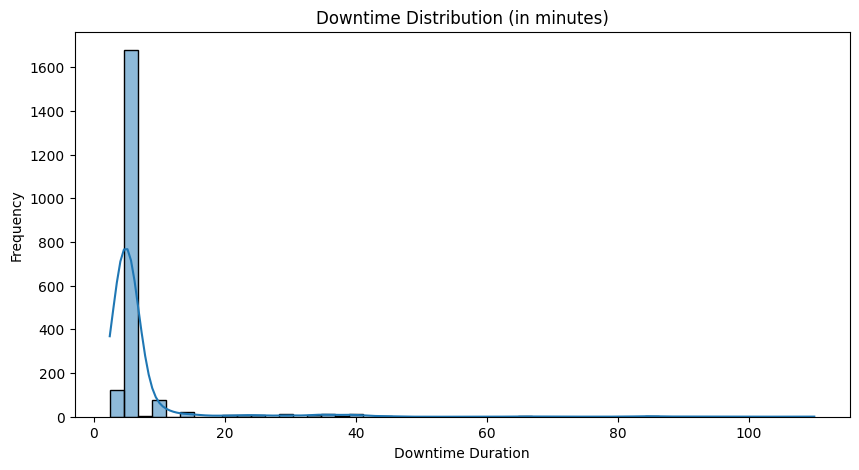

In [ ]:
# Plot downtime distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["downtime_minutes"], bins=50, kde=True)
plt.title("Downtime Distribution (in minutes)")
plt.xlabel("Downtime Duration")
plt.ylabel("Frequency")
plt.show()

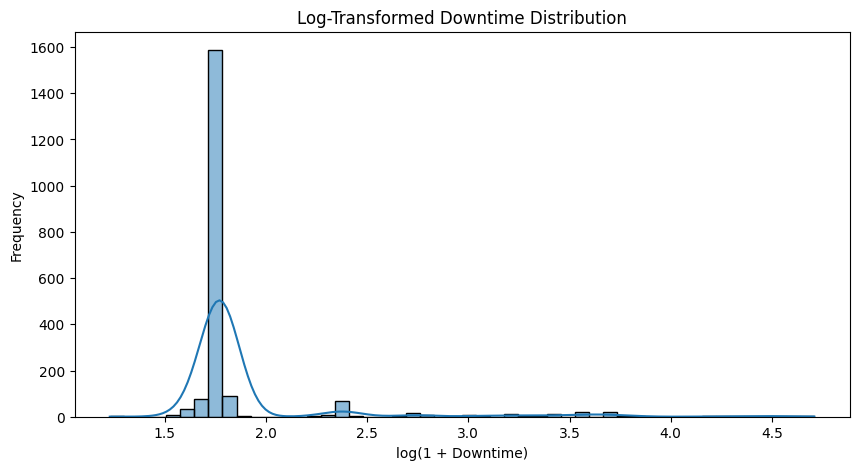

In [ ]:
# Log-transformed downtime (to check long-tail)
plt.figure(figsize=(10, 5))
sns.histplot(df["downtime_minutes"].apply(lambda x: np.log1p(x)), bins=50, kde=True)
plt.title("Log-Transformed Downtime Distribution")
plt.xlabel("log(1 + Downtime)")
plt.ylabel("Frequency")
plt.show()

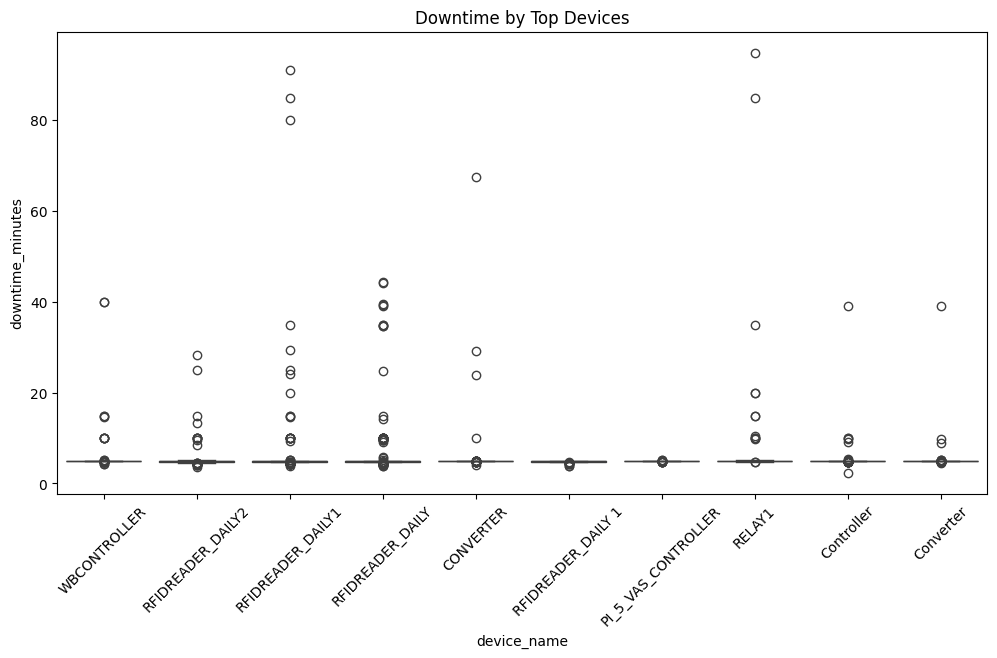

In [ ]:
# Downtime by device
plt.figure(figsize=(12, 6))
top_devices = df["device_name"].value_counts().nlargest(10).index
sns.boxplot(data=df[df["device_name"].isin(top_devices)], x="device_name", y="downtime_minutes")
plt.xticks(rotation=45)
plt.title("Downtime by Top Devices")
plt.show()

In [ ]:
from scipy.stats import skew
print("Skewness:", skew(df["downtime_minutes"]))

Skewness: 6.580929054437082


the skewness is extremely very high, Means most downtimes are short, but a few long ones pull the distribution heavily to the right (long tail).

Handling highly skewed data 

In [ ]:
def bin_downtime(x):
    if x <= 5:
        return "short"
    elif x <= 60:
        return "medium"
    elif x <= 360:
        return "long"
    else:
        return "very_long"

df["downtime_bin"] = df["downtime_minutes"].apply(bin_downtime)


In [ ]:
df = pd.get_dummies(df, columns=["downtime_bin"], prefix="bin")

Applying Log transformation to reduce skew

In [ ]:
import numpy as np

df["downtime_log"] = np.log1p(df["downtime_minutes"])


In [ ]:
# #During prediction time (after model predicts the log values), you’ll reverse it using:
# predicted_minutes = np.expm1(predicted_log)

In [ ]:
#adding feature for most common downtime (4.916667)
df["is_4_916667"] = (df["downtime_minutes"] == 4.916667).astype(int)


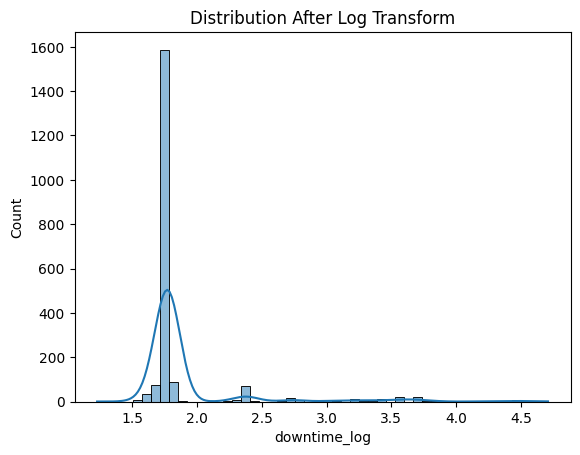

Skewness after log1p: 3.8118270516772785


In [ ]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

sns.histplot(df["downtime_log"], bins=50, kde=True)
plt.title("Distribution After Log Transform")
plt.show()

print("Skewness after log1p:", skew(df["downtime_log"]))

In [ ]:
df.columns

Index(['id', 'device_ip', 'device_name', 'time_down', 'time_up', 'plant_code',
       'location_name', 'plant_name', 'status', 'idel_time',
       'downtime_minutes', 'down_hour', 'down_day', 'down_minute',
       'is_weekend', 'month', 'bin_long', 'bin_medium', 'bin_short',
       'downtime_log', 'is_4_916667'],
      dtype='object')

#### Step-2: Temporal Feature extraction

In [ ]:
df["time_down"] = pd.to_datetime(df["time_down"])

df["dayofweek"] = df["time_down"].dt.dayofweek  # Monday = 0
df["dayofmonth"] = df["time_down"].dt.day


Step-2B Time since previous downtime

In [ ]:
# Convert time_down to datetime if not already
df["time_down"] = pd.to_datetime(df["time_down"])

# Sort by device and timestamp
df = df.sort_values(by=["device_ip", "time_down"])

# Previous downtime per device
df["prev_time_down"] = df.groupby("device_ip")["time_down"].shift(1)

# Time since last failure in minutes
df["time_since_last_down"] = (df["time_down"] - df["prev_time_down"]).dt.total_seconds() / 60

# Fill NaNs with median
df["time_since_last_down"] = df["time_since_last_down"].fillna(df["time_since_last_down"].median())


In [ ]:
df.columns

Index(['id', 'device_ip', 'device_name', 'time_down', 'time_up', 'plant_code',
       'location_name', 'plant_name', 'status', 'idel_time',
       'downtime_minutes', 'down_hour', 'down_day', 'down_minute',
       'is_weekend', 'month', 'bin_long', 'bin_medium', 'bin_short',
       'downtime_log', 'is_4_916667', 'dayofweek', 'dayofmonth',
       'prev_time_down', 'time_since_last_down'],
      dtype='object')

In [ ]:
# Step 0: Reset index completely to remove old timestamp index if exists
df = df.reset_index(drop=True)

# Step 1: Convert to datetime
df['timestamp'] = pd.to_datetime(df['prev_time_down'], errors='coerce')

# Step 2: Drop invalid timestamps
df = df.dropna(subset=['timestamp'])

# Step 3: Sort by device and timestamp
df = df.sort_values(['device_name', 'timestamp'])

# Step 4: Set timestamp as index (for rolling window)
df = df.set_index('timestamp')

# Step 5: Rolling count of recent failures per device in the past 1 day
df['recent_failures_1d'] = (
    df.groupby("device_name")["downtime_minutes"]
    .rolling("1d", min_periods=1)
    .count()
    .reset_index(level=0, drop=True)
)

# Step 6: Reset index again to continue with regular DataFrame usage
df = df.reset_index()


In [ ]:
df["time_up"] = pd.to_datetime(df["time_up"])
df["prev_time_up"] = df.groupby("device_ip")["time_up"].shift(1)

df["time_since_last_up"] = (df["time_down"] - df["prev_time_up"]).dt.total_seconds() / 60

df["time_since_last_up"] = df["time_since_last_up"].fillna(df["time_since_last_up"].median())


In [ ]:
df.head()

,timestamp,id,device_ip,device_name,time_down,time_up,plant_code,location_name,plant_name,status,...,bin_short,downtime_log,is_4_916667,dayofweek,dayofmonth,prev_time_down,time_since_last_down,recent_failures_1d,prev_time_up,time_since_last_up
0,2025-07-03 16:00:01,3972,10.235.162.143,Big LED,2025-07-04 19:15:13,2025-07-04 19:30:02,N239,YARD-OUT,Ametha,C,...,False,2.761064,0,4,4,2025-07-03 16:00:01,1635.200000,1.0,NaT,132.641667
1,2025-07-04 19:15:13,3973,10.235.162.143,Big LED,2025-07-04 19:34:57,2025-07-04 19:54:48,N239,YARD-OUT,Ametha,C,...,False,3.037354,0,4,4,2025-07-04 19:15:13,19.733333,1.0,2025-07-04 19:30:02,4.916667
2,2025-07-04 19:34:57,4009,10.235.162.143,Big LED,2025-07-05 01:59:47,2025-07-05 02:35:02,N239,YARD-OUT,Ametha,C,...,False,3.590439,0,5,5,2025-07-04 19:34:57,384.833333,2.0,2025-07-04 19:54:48,364.983333
3,2025-07-05 01:59:47,4022,10.235.162.143,Big LED,2025-07-05 03:30:02,2025-07-05 03:35:02,N239,YARD-OUT,Ametha,C,...,True,1.791759,0,5,5,2025-07-05 01:59:47,90.250000,3.0,2025-07-05 02:35:02,55.000000
4,2025-06-22 16:54:08,2427,10.236.250.23,CAMERA 1,2025-07-05 07:00:40,2025-07-05 07:05:35,NE03,WB01,Maratha,C,...,True,1.777773,0,5,5,2025-06-22 16:54:08,18126.533333,1.0,NaT,132.641667


#### Step-3 :Device level aggregates (group level features)

In [ ]:
# First, ensure relevant columns are numeric
numeric_cols = [
    "downtime_minutes", "idel_time", 
    "time_since_last_down", "time_since_last_up"
]

# Convert to numeric just in case (e.g., in case of bad string data)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now perform the groupby aggregation
device_agg = df.groupby("device_ip")[numeric_cols].agg({
    "downtime_minutes": ["mean", "median", "std", "max", "min", "count"],
    "idel_time": ["mean", "std", "max"],
    "time_since_last_down": ["mean"],
    "time_since_last_up": ["mean"]
})

# Flatten column names
device_agg.columns = ["_".join(col).strip() for col in device_agg.columns.values]
device_agg.reset_index(inplace=True)

# Merge back into main dataframe
df = df.merge(device_agg, on="device_ip", how="left")


successfully enhanced the dataset with the device-level statistical summaries - which often help xgboost pickup meaningful patterns

#### Step-4 Label Encoding

 Label Encoding for High-cardinality-safe Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ["device_name", "plant_code", "location_name", "plant_name", "status"]

# Apply Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

applying target encoding:

we have high-cardinality categorical columns (likely many unique values) for device name so using target encoding only for device_name column

In [ ]:
# Target encoding for 'device_name'
device_mean_downtime = df.groupby("device_name")["downtime_minutes"].mean()
df["device_name_te"] = df["device_name"].map(device_mean_downtime)

# (Optional) drop the original device_name if you're using only encoded version
df.drop("device_name", axis=1, inplace=True)


#### Creating Binary target for binary classification

Approach:
Sort data by device_name and timestamp

For each row, check if next downtime happens within 15 minutes

If yes → label is_down_soon = 1, else 0

In [ ]:
# Step 1: Sort by device and time
df = df.sort_values(["device_name_te", "timestamp"]).reset_index(drop=True)

# Step 2: Shift timestamps to get next downtime
df['next_down_time'] = df['timestamp'].shift(-1)
df['next_device'] = df['device_name_te'].shift(-1)

# Step 3: Check if next event is for same device
same_device = df['device_name_te'] == df['next_device']

# Step 4: Calculate time difference in minutes
df['time_to_next_down'] = (df['next_down_time'] - df['timestamp']).dt.total_seconds() / 60.0

# Step 5: Create label
df['is_down_soon'] = ((same_device) & (df['time_to_next_down'] <= 15)).astype(int)

# Drop helper columns if not needed
df.drop(['next_down_time', 'next_device', 'time_to_next_down'], axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Define features for classification
features = df.drop(columns=["downtime_minutes", "is_down_soon", "timestamp"])
target = df["is_down_soon"]

# Step 2: Split into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)


In [ ]:
# Drop object and datetime columns
invalid_cols = X_train_clf.select_dtypes(include=["object", "datetime64"]).columns
X_train_clf = X_train_clf.drop(columns=invalid_cols)
X_test_clf = X_test_clf.drop(columns=invalid_cols)

print("Dropped columns:", list(invalid_cols))


Dropped columns: ['device_ip', 'time_down', 'time_up', 'prev_time_down', 'prev_time_up']


In [ ]:
import pandas as pd

print("Missing values per column:\n", pd.DataFrame(X_train_clf).isnull().sum())


Missing values per column:
 id                              0
plant_code                      0
location_name                   0
plant_name                      0
status                          0
idel_time                    1452
down_hour                       0
down_day                        0
down_minute                     0
is_weekend                      0
month                           0
bin_long                        0
bin_medium                      0
bin_short                       0
downtime_log                    0
is_4_916667                     0
dayofweek                       0
dayofmonth                      0
time_since_last_down            0
recent_failures_1d              0
time_since_last_up              0
downtime_minutes_mean           0
downtime_minutes_median         0
downtime_minutes_std           25
downtime_minutes_max            0
downtime_minutes_min            0
downtime_minutes_count          0
idel_time_mean               1452
idel_time_std       

In [ ]:
# Drop fully null columns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Convert to DataFrame if not already
X_train_clf_df = pd.DataFrame(X_train_clf)

cols_to_drop = ['idel_time', 'idel_time_mean', 'idel_time_std', 'idel_time_max']
X_train_clf_df = X_train_clf_df.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
# Re-run imputation
X_train_clf_imputed = imputer.fit_transform(X_train_clf_df)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train_clf_imputed, y_train_clf)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_clf_imputed = imputer.fit_transform(X_train_clf_df)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_clf_imputed, y_train_clf)

print("Before SMOTE:", X_train_clf.shape, "Class distribution:", y_train_clf.value_counts().to_dict())
print("After SMOTE:", X_resampled.shape, "Class distribution:", dict(zip(*np.unique(y_resampled, return_counts=True))))


Before SMOTE: (1452, 33) Class distribution: {0: 1098, 1: 354}
After SMOTE: (2196, 29) Class distribution: {0: 1098, 1: 1098}


In [ ]:
X_test_clf = X_test_clf.drop(columns=cols_to_drop)

In [ ]:
print("Features used from training data:")
print(X_train_clf.columns.tolist())


📌 Features used from training data:
['id', 'plant_code', 'location_name', 'plant_name', 'status', 'idel_time', 'down_hour', 'down_day', 'down_minute', 'is_weekend', 'month', 'bin_long', 'bin_medium', 'bin_short', 'downtime_log', 'is_4_916667', 'dayofweek', 'dayofmonth', 'time_since_last_down', 'recent_failures_1d', 'time_since_last_up', 'downtime_minutes_mean', 'downtime_minutes_median', 'downtime_minutes_std', 'downtime_minutes_max', 'downtime_minutes_min', 'downtime_minutes_count', 'idel_time_mean', 'idel_time_std', 'idel_time_max', 'time_since_last_down_mean', 'time_since_last_up_mean', 'device_name_te']


In [ ]:
print("📌 Features used from training data:")
print(X_train_clf_df.columns.tolist())


📌 Features used from training data:
['id', 'plant_code', 'location_name', 'plant_name', 'status', 'down_hour', 'down_day', 'down_minute', 'is_weekend', 'month', 'bin_long', 'bin_medium', 'bin_short', 'downtime_log', 'is_4_916667', 'dayofweek', 'dayofmonth', 'time_since_last_down', 'recent_failures_1d', 'time_since_last_up', 'downtime_minutes_mean', 'downtime_minutes_median', 'downtime_minutes_std', 'downtime_minutes_max', 'downtime_minutes_min', 'downtime_minutes_count', 'time_since_last_down_mean', 'time_since_last_up_mean', 'device_name_te']


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train on the SMOTE-balanced data
clf.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred = clf.predict(X_test_clf)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred))


Confusion Matrix:
 [[253  21]
 [ 35  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       274
           1       0.72      0.61      0.66        89

    accuracy                           0.85       363
   macro avg       0.80      0.77      0.78       363
weighted avg       0.84      0.85      0.84       363



c:\Users\Saksh\PMC\pmsenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
y_probs = clf.predict_proba(X_test_clf)[:, 1]
y_pred_thresh = (y_probs > 0.35).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_thresh))


Confusion Matrix:
 [[244  30]
 [ 33  56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       274
           1       0.65      0.63      0.64        89

    accuracy                           0.83       363
   macro avg       0.77      0.76      0.76       363
weighted avg       0.82      0.83      0.83       363



HYPERPARAMTER TUNING

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the classifier
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Use f1-score for class 1 (failure) as scoring metric
scorer = make_scorer(f1_score, pos_label=1)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    scoring=scorer,
    cv=3,
    n_iter=25,  # You can increase to 50–100 for more thorough tuning
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on resampled (SMOTE) data
random_search.fit(X_resampled, y_resampled)

# Best params and score
print("Best F1 score:", random_search.best_score_)
print("Best hyperparameters:\n", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best F1 score: 0.8636970508806612
Best hyperparameters:
 {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


c:\Users\Saksh\PMC\pmsenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Predict on original test set
y_pred_best = best_model.predict(X_test_clf)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_best))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_best))


Confusion Matrix:
 [[253  21]
 [ 37  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       274
           1       0.71      0.58      0.64        89

    accuracy                           0.84       363
   macro avg       0.79      0.75      0.77       363
weighted avg       0.83      0.84      0.83       363



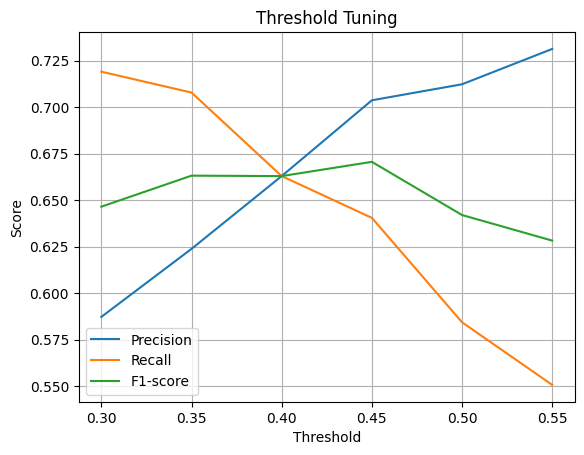

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

thresholds = np.arange(0.3, 0.55, 0.05)
scores = []

y_proba = best_model.predict_proba(X_test_clf)[:, 1]

for thresh in thresholds:
    y_thresh_pred = (y_proba >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_clf, y_thresh_pred, average='binary')
    scores.append((thresh, precision, recall, f1))

# Plotting
thresh_vals, precisions, recalls, f1s = zip(*scores)
plt.plot(thresh_vals, precisions, label="Precision")
plt.plot(thresh_vals, recalls, label="Recall")
plt.plot(thresh_vals, f1s, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Threshold Tuning")
plt.grid(True)
plt.show()


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# # Predict with probability threshold 0.40
# y_pred_thresh = (y_proba >= 0.40).astype(int)

# # Evaluate
# print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_thresh))
# print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_thresh))

Confusion Matrix:
 [[244  30]
 [ 30  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       274
           1       0.66      0.66      0.66        89

    accuracy                           0.83       363
   macro avg       0.78      0.78      0.78       363
weighted avg       0.83      0.83      0.83       363



In [ ]:
# import joblib

# joblib.dump({
#     'model': best_model,
#     'threshold': 0.40
# }, "xgb_failure_classifier.pkl")
# print("Model and threshold saved successfully.")

Model and threshold saved successfully.


In [ ]:
# import joblib

# joblib.dump({
#     'type': 'classification',
#     'model': best_model,
#     'threshold': 0.40  #best threshold
# }, 'xgb_failure_classifier.pkl')


['xgb_failure_classifier.pkl']

In [ ]:
# import json

# # For classification
# with open("classification_model_features.json", "w") as f:
#     json.dump(list(X_train_clf_df.columns), f)


1st model trained , that was trained without SMOTE 

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Define the classifier
# clf_model = XGBClassifier(
#     n_estimators=100,
#     max_depth=5,
#     learning_rate=0.1,
#     use_label_encoder=False,
#     eval_metric="logloss",
#     random_state=42
# )

# # Train the classifier
# clf_model.fit(X_train_clf, y_train_clf)

# # Predict
# y_pred_clf = clf_model.predict(X_test_clf)

# # Evaluate
# print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))
# print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       274
           1       0.81      0.58      0.68        89

    accuracy                           0.87       363
   macro avg       0.84      0.77      0.80       363
weighted avg       0.86      0.87      0.86       363

Confusion Matrix:
 [[262  12]
 [ 37  52]]


c:\Users\Saksh\PMC\pmsenv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

In [ ]:
# 

Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

y = df["downtime_minutes"]

drop_cols = [
    "id", "downtime_minutes", "time_down", "time_up", "downtime_log",
    "device_ip",  
]

if "device_name" in df.columns:
    drop_cols.append("device_name")

X = df.drop(columns=drop_cols)

print("Final feature columns:", X.columns.tolist())

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Final feature columns: ['timestamp', 'plant_code', 'location_name', 'plant_name', 'status', 'idel_time', 'down_hour', 'down_day', 'down_minute', 'is_weekend', 'month', 'bin_long', 'bin_medium', 'bin_short', 'is_4_916667', 'dayofweek', 'dayofmonth', 'prev_time_down', 'time_since_last_down', 'recent_failures_1d', 'prev_time_up', 'time_since_last_up', 'downtime_minutes_mean', 'downtime_minutes_median', 'downtime_minutes_std', 'downtime_minutes_max', 'downtime_minutes_min', 'downtime_minutes_count', 'idel_time_mean', 'idel_time_std', 'idel_time_max', 'time_since_last_down_mean', 'time_since_last_up_mean', 'device_name_te']


In [ ]:
# Drop datetime columns from train and test
X_train = X_train.drop(columns=["prev_time_down", "prev_time_up"], errors="ignore")
X_test = X_test.drop(columns=["prev_time_down", "prev_time_up"], errors="ignore")


In [ ]:
# Drop timestamp from features
X_train = X_train.drop(columns=['timestamp'], errors='ignore')
X_test = X_test.drop(columns=['timestamp'], errors='ignore')


Model Training

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")

R² Score: 0.9602
MAE: 0.44 minutes
RMSE: 1.84 minutes


In [ ]:
import joblib
joblib.dump(xgb_model, "downtime_predictor_xgbmodel.pkl")


['downtime_predictor_xgbmodel.pkl']